## Load the dataset 

1. Use the datasaet from https://www.kaggle.com/tayoaki/kickstarter-dataset#18k_Projects.csv
2. Create a scraper from the above dataset an generate a new one. 

In [519]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as sp
import datetime

In [520]:
cms = pd.read_csv('./dataset/comments.csv')
cms.head()

,project_url,comment,created_at,comment_id
0,https://www.kickstarter.com/projects/200510190...,I am sorry for your personal problems however ...,1451947668,UHJvamVjdENvbW1lbnQtMTIxNzA1MDE=
1,https://www.kickstarter.com/projects/200510190...,"Ron, as I told you before, this book publishin...",1451760497,UHJvamVjdENvbW1lbnQtMTIxNjA2NjM=
2,https://www.kickstarter.com/projects/200510190...,"Ron, I really don't appreciate you calling me ...",1451759861,UHJvamVjdENvbW1lbnQtMTIxNjA2MzI=
3,https://www.kickstarter.com/projects/200510190...,If anyone can help me find Dorian please conta...,1451712581,UHJvamVjdENvbW1lbnQtMTIxNTkwNjA=
4,https://www.kickstarter.com/projects/200510190...,"Dorian, I am going to track you down and expos...",1451712381,UHJvamVjdENvbW1lbnQtMTIxNTkwNDc=


create a new column with the date accoriding with created_at field that is in milliseconds.

In [521]:
cms.drop(['project_url'], 1,inplace=True)
cms.drop(['comment_id'], 1, inplace = True)

In [522]:
cms.head()

,comment,created_at
0,I am sorry for your personal problems however ...,1451947668
1,"Ron, as I told you before, this book publishin...",1451760497
2,"Ron, I really don't appreciate you calling me ...",1451759861
3,If anyone can help me find Dorian please conta...,1451712581
4,"Dorian, I am going to track you down and expos...",1451712381


# Word tokenization

In [523]:
from spacy.lang.en import English

# Load english tokenizer, tagger, parser, NER and word vectors
nlp = English()

A continuación se extrae el primer comentario del dataset y se procede a generar los tokens de este. 

In [524]:
# Word  tokenization, breaking up the text into individual words. 

text = cms['comment'][0]
print(text)


I am sorry for your personal problems however it is your responsible to keep your backers informed. an email once in a while would work.
I would like to have your address, phone number and email address.
by your actions and keeping your backers in the dark for a year and half I had no other choice but to feel that us backers had been scammed. I personally feel its been long enough already.
so if this going to take another year? keep your backers in the loop. Taking our money and never hearing from you is a very asshole thing to do. welcome to the grown world.


In [525]:
doc = nlp(text)

In [526]:
tokens = []

for token in doc:
    tokens.append(token.text)

print(tokens)

['I', 'am', 'sorry', 'for', 'your', 'personal', 'problems', 'however', 'it', 'is', 'your', 'responsible', 'to', 'keep', 'your', 'backers', 'informed', '.', 'an', 'email', 'once', 'in', 'a', 'while', 'would', 'work', '.', '\n', 'I', 'would', 'like', 'to', 'have', 'your', 'address', ',', 'phone', 'number', 'and', 'email', 'address', '.', '\n', 'by', 'your', 'actions', 'and', 'keeping', 'your', 'backers', 'in', 'the', 'dark', 'for', 'a', 'year', 'and', 'half', 'I', 'had', 'no', 'other', 'choice', 'but', 'to', 'feel', 'that', 'us', 'backers', 'had', 'been', 'scammed', '.', 'I', 'personally', 'feel', 'its', 'been', 'long', 'enough', 'already', '.', '\n', 'so', 'if', 'this', 'going', 'to', 'take', 'another', 'year', '?', 'keep', 'your', 'backers', 'in', 'the', 'loop', '.', 'Taking', 'our', 'money', 'and', 'never', 'hearing', 'from', 'you', 'is', 'a', 'very', 'asshole', 'thing', 'to', 'do', '.', 'welcome', 'to', 'the', 'grown', 'world', '.']


## Sentence tokenization

In [527]:
sbd = nlp.create_pipe('sentencizer')
# Add the component to the pipeline
nlp.add_pipe(sbd)

In [528]:
docst = nlp(text)

In [529]:
sentences = []
for s in docst.sents:
    sentences.append(s.text)

print(sentences)

['I am sorry for your personal problems however it is your responsible to keep your backers informed.', 'an email once in a while would work.', '\nI would like to have your address, phone number and email address.', '\nby your actions and keeping your backers in the dark for a year and half I had no other choice but to feel that us backers had been scammed.', 'I personally feel its been long enough already.', '\nso if this going to take another year?', 'keep your backers in the loop.', 'Taking our money and never hearing from you is a very asshole thing to do.', 'welcome to the grown world.']


## Cleaning text data: Removing stopwords

In [530]:
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [531]:
print('Number of stop words:%d' % len(spacy_stopwords))

Number of stop words:326


In [532]:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])


First ten stop words: ['quite', 'through', 'almost', 'into', 'keep', 'here', 'since', 'everyone', 'until', 'whereas', 'show', 'move', 'can', 'whereupon', '’s', 'alone', 'not', 'hereby', 'made', 'amongst']


Ahora se procede a emplear a limpiar las oraciones usando los stop words

In [533]:
filtered_sentences = []
for word in docst :
    if word.is_stop == False:
        filtered_sentences.append(word)
print("Filtered sentence:", filtered_sentences)

Filtered sentence: [sorry, personal, problems, responsible, backers, informed, ., email, work, ., 
, like, address, ,, phone, number, email, address, ., 
, actions, keeping, backers, dark, year, half, choice, feel, backers, scammed, ., personally, feel, long, ., 
, going, year, ?, backers, loop, ., Taking, money, hearing, asshole, thing, ., welcome, grown, world, .]


## Lemmatization
Processing words that reduces them to their roots. 

In [534]:
lem = nlp(text)

for word in lem:
    print(word.text, word.lemma_)

I I
am be
sorry sorry
for for
your your
personal personal
problems problem
however however
it it
is be
your your
responsible responsible
to to
keep keep
your your
backers backer
informed inform
. .
an a
email email
once once
in in
a a
while while
would would
work work
. .

 

I I
would would
like like
to to
have have
your your
address address
, ,
phone phone
number numb
and and
email email
address address
. .

 

by by
your your
actions action
and and
keeping keep
your your
backers backer
in in
the the
dark dark
for for
a a
year year
and and
half half
I I
had have
no no
other other
choice choice
but but
to to
feel feel
that that
us us
backers backer
had have
been be
scammed scam
. .
I I
personally personally
feel feel
its its
been be
long long
enough enough
already already
. .

 

so so
if if
this this
going go
to to
take take
another another
year year
? ?
keep keep
your your
backers backer
in in
the the
loop loop
. .
Taking Taking
our our
money money
and and
never never
hearing hear
f

## Part of Speech (POS) Tagging

Definir la funcion de una palabra dentro de una oración

In [535]:
# importing the model en_core_web_sm of English for vocabluary, syntax & entities
import en_core_web_sm

In [536]:
pos = en_core_web_sm.load()

pos_docs = pos(text)

for word in pos_docs:
    print(word.text, word.pos_)


I PRON
am VERB
sorry ADJ
for ADP
your DET
personal ADJ
problems NOUN
however ADV
it PRON
is VERB
your DET
responsible ADJ
to PART
keep VERB
your DET
backers NOUN
informed VERB
. PUNCT
an DET
email NOUN
once ADV
in ADP
a DET
while NOUN
would VERB
work VERB
. PUNCT

 SPACE
I PRON
would VERB
like VERB
to PART
have VERB
your DET
address NOUN
, PUNCT
phone NOUN
number NOUN
and CCONJ
email NOUN
address NOUN
. PUNCT

 SPACE
by ADP
your DET
actions NOUN
and CCONJ
keeping VERB
your DET
backers NOUN
in ADP
the DET
dark NOUN
for ADP
a DET
year NOUN
and CCONJ
half NOUN
I PRON
had VERB
no DET
other ADJ
choice NOUN
but ADP
to PART
feel VERB
that ADP
us PRON
backers NOUN
had VERB
been VERB
scammed VERB
. PUNCT
I PRON
personally ADV
feel VERB
its DET
been VERB
long ADV
enough ADV
already ADV
. PUNCT

 SPACE
so ADV
if ADP
this DET
going VERB
to PART
take VERB
another DET
year NOUN
? PUNCT
keep VERB
your DET
backers NOUN
in ADP
the DET
loop NOUN
. PUNCT
Taking VERB
our DET
money NOUN
and CCONJ
never ADV

## Entity Detection

Determinar a partir del texto lugares, personas, organizaciones...


In [537]:
from spacy import displacy

comment = pos(text)
print(comment)

I am sorry for your personal problems however it is your responsible to keep your backers informed. an email once in a while would work.
I would like to have your address, phone number and email address.
by your actions and keeping your backers in the dark for a year and half I had no other choice but to feel that us backers had been scammed. I personally feel its been long enough already.
so if this going to take another year? keep your backers in the loop. Taking our money and never hearing from you is a very asshole thing to do. welcome to the grown world.


In [538]:
entities=[(i, i.label_, i.label) for i in comment.ents]
print(entities)

[(a year, 'DATE', 391), (half, 'CARDINAL', 397), (another year, 'DATE', 391)]


In [539]:
displacy.render(comment, style = "ent", jupyter=True)

## Dependency Parsing 

Permite determinar el significado de la oración, analizando cómo esta construida la oración para determinar cómo las palabras individuales estan relaionadas unas a otras.


In [540]:
docp = pos(text[:30])

for chunk in docp.noun_chunks:
   print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

I I nsubj am
your personal p p pobj for


In [541]:
displacy.render(docp, style="dep", jupyter=True)

## Word vector representation
Es una representacion numerica  de una palabra que contiene relaciones con otras palabras.

In [542]:
comment = pos(text)
print(comment.vector.shape)
print(comment.vector)

(96,)
[-0.09407231 -0.9075469  -0.45445594 -1.1411858  -0.44099     0.9385797
  1.3443414   0.6658818  -0.5947174   0.5939405   0.07600813  0.72629815
 -1.106578   -1.3864602  -0.42618632 -0.02737986 -0.10878552  0.71915543
  1.1169592   1.2316732  -0.69583136 -0.32771385  1.3548603   1.3309181
 -0.22622412  1.0586677   0.55602443  0.27411783 -0.17048214  1.2525873
  0.2702457  -0.46963167 -2.4193504  -0.60992193  0.38862514  0.6872649
  1.1327479   0.35229194 -1.3421861   0.42735565 -0.16393733  1.6086477
  0.61497545  1.7041671  -1.0263338  -0.30049253 -0.33176586 -0.34872532
 -0.8683674  -0.7239049   0.02091672 -1.2001013  -0.7405391  -0.16871308
  0.27054113 -1.1542869   0.388623    0.53662574 -1.1061631   0.22368787
 -0.6537074  -0.17217955  0.55725366 -0.00785073 -0.4597652   0.5792406
  0.37737897  0.3109109  -1.0048231   0.23630111  0.34488347 -0.88607776
  0.03269416  0.37645274  0.7382326   1.6214384   0.5343185  -0.16599362
 -0.06891172 -0.9138428   0.0607979  -0.56894875 -0

## Working and scoring


In [543]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [544]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [545]:
sentiment_analyzer_scores(text)

I am sorry for your personal problems however it is your responsible to keep your backers informed. an email once in a while would work.
I would like to have your address, phone number and email address.
by your actions and keeping your backers in the dark for a year and half I had no other choice but to feel that us backers had been scammed. I personally feel its been long enough already.
so if this going to take another year? keep your backers in the loop. Taking our money and never hearing from you is a very asshole thing to do. welcome to the grown world. {'neg': 0.043, 'neu': 0.877, 'pos': 0.08, 'compound': 0.6059}


In [546]:

print(sentences)

['I am sorry for your personal problems however it is your responsible to keep your backers informed.', 'an email once in a while would work.', '\nI would like to have your address, phone number and email address.', '\nby your actions and keeping your backers in the dark for a year and half I had no other choice but to feel that us backers had been scammed.', 'I personally feel its been long enough already.', '\nso if this going to take another year?', 'keep your backers in the loop.', 'Taking our money and never hearing from you is a very asshole thing to do.', 'welcome to the grown world.']


In [547]:
for s in sentences:
    sentiment_analyzer_scores(s)
    print()

I am sorry for your personal problems however it is your responsible to keep your backers informed. {'neg': 0.207, 'neu': 0.674, 'pos': 0.119, 'compound': -0.1779}

an email once in a while would work.---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


I would like to have your address, phone number and email address. {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.4215}


by your actions and keeping your backers in the dark for a year and half I had no other choice but to feel that us backers had been scammed. {'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.1531}

I personally feel its been long enough already. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


so if this going to take another year?- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

keep your backers in the loop.---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Taking our money and never hearing from you is a very asshole thing to do. {'neg': 0.0, 'neu': 1.0, 'pos': 0.

In [548]:
def sentiment_analyzer_scores(sentence):
    ss = analyser.polarity_scores(sentence)
    if ss["compound"] >= 0.5:
        return "positive"
    elif ss["compound"] <= -0.5:
        return "negative"
    else:
        return "neutral"

In [549]:
cms['sentiment'] = cms['comment'].apply(sentiment_analyzer_scores)

In [550]:
cms.head()

,comment,created_at,sentiment
0,I am sorry for your personal problems however ...,1451947668,positive
1,"Ron, as I told you before, this book publishin...",1451760497,negative
2,"Ron, I really don't appreciate you calling me ...",1451759861,negative
3,If anyone can help me find Dorian please conta...,1451712581,positive
4,"Dorian, I am going to track you down and expos...",1451712381,neutral


In [551]:
print(cms['comment'][0])

I am sorry for your personal problems however it is your responsible to keep your backers informed. an email once in a while would work.
I would like to have your address, phone number and email address.
by your actions and keeping your backers in the dark for a year and half I had no other choice but to feel that us backers had been scammed. I personally feel its been long enough already.
so if this going to take another year? keep your backers in the loop. Taking our money and never hearing from you is a very asshole thing to do. welcome to the grown world.


In [552]:
print(cms['comment'][1])

Ron, as I told you before, this book publishing is proving harder than I previously expected.  This past year and a half has been very hard on me.  I relocated to take care of my grandfather who was battling cancer and passed away.  I have been very depressed and struggling for awhile now.  I cared for my Nana for the last three years of her life and loved her very much.  I'm embarrassed and sad that the book is not published yet.  This is my first book and I'm unsure of the whole process.  How many books have you published?  I never intended to "scam" people out of money.  You calling me a "crook" is a very asshole thing to do.  I'm sorry you feel that way.


## NLTK Analysis

In [553]:
### Clean the data
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def sentiment_score(comment):
    return TextBlob(comment).sentiment 

def sentiment(sentiment_score):
    ss = (sentiment_score[0])*100
    if ss >= 10:
        return "positive"
    elif ss < 0:
        return "negative"
    else: return 'neutral'
    

## lower case

cms['comment'] = cms['comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))

    
## remove punctuation
cms['comment'] = cms['comment'].apply(lambda s: (re.sub(r'[^\w\s]','',s)) )



stop = stopwords.words('english')
cms['comment'] = cms['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


st = PorterStemmer()
cms['comment'] = cms['comment'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

## Frequency distribution 

In [554]:


comments = cms.comment.str.cat(sep=' ')
tokens = word_tokenize(comments)

vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:100]
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

print(tokens)

['sorri', 'person', 'problem', 'howev', 'respons', 'keep', 'backer', 'inform', 'email', 'would', 'work', 'would', 'like', 'address', 'phone', 'number', 'email', 'address', 'action', 'keep', 'backer', 'dark', 'year', 'half', 'choic', 'feel', 'us', 'backer', 'scam', 'person', 'feel', 'long', 'enough', 'alreadi', 'go', 'take', 'anoth', 'year', 'keep', 'backer', 'loop', 'take', 'money', 'never', 'hear', 'asshol', 'thing', 'welcom', 'grown', 'world', 'ron', 'told', 'book', 'publish', 'prove', 'harder', 'previous', 'expect', 'past', 'year', 'half', 'hard', 'reloc', 'take', 'care', 'grandfath', 'battl', 'cancer', 'pass', 'away', 'depress', 'struggl', 'awhil', 'care', 'nana', 'last', 'three', 'year', 'life', 'love', 'much', 'im', 'embarrass', 'sad', 'book', 'publish', 'yet', 'first', 'book', 'im', 'unsur', 'whole', 'process', 'mani', 'book', 'publish', 'never', 'intend', 'scam', 'peopl', 'money', 'call', 'crook', 'asshol', 'thing', 'im', 'sorri', 'feel', 'way', 'ron', 'realli', 'dont', 'apprec

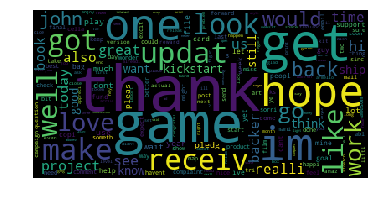

<Figure size 1080x720 with 0 Axes>

In [555]:
wordcloud = WordCloud(width=400, height=200)
wordcloud.generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(15,10))
plt.show()

## Scoring the comments


In [556]:
cms['sentiment_score'] = cms['comment'].apply(sentiment_score)
cms['sentiment'] = cms['sentiment_score'].apply(sentiment)
cms['sentiment_percent'] = cms['sentiment_score'].apply(lambda x: x[0]*100)

In [557]:
cms.head()

,comment,created_at,sentiment,sentiment_score,sentiment_percent
0,sorri person problem howev respons keep backer...,1451947668,negative,"(-0.05333333333333333, 0.31333333333333335)",-5.333333
1,ron told book publish prove harder previous ex...,1451760497,negative,"(-0.03263888888888888, 0.3131944444444445)",-3.263889
2,ron realli dont appreci call sham crook past y...,1451759861,negative,"(-0.05902777777777779, 0.39791666666666664)",-5.902778
3,anyon help find dorian pleas contact rowemontg...,1451712581,neutral,"(0.0, 0.0)",0.000000
4,dorian go track expos crook book sham way scre...,1451712381,negative,"(-0.2, 0.3)",-20.000000


In [558]:
cms['comment'][0]

'sorri person problem howev respons keep backer inform email would work would like address phone number email address action keep backer dark year half choic feel us backer scam person feel long enough alreadi go take anoth year keep backer loop take money never hear asshol thing welcom grown world'

In [559]:
cms['comment'][4]

'dorian go track expos crook book sham way screw famili friend 10000 sue find'

In [560]:
positives=cms[cms['sentiment'] == 'positive']
positives.head()


for i in range(0,10):
    print(positives['comment'])


5                    agre mark anyth would better silenc
6      dorian think campaign day gave small amount se...
7      havent seen book yet littl concern look forwar...
13      still receiv copi would love know mine ever ship
30     yeah would nice hear someth im sure go either ...
32     awesom well im glad someon kinda heard someth ...
42     thank much keith realli like anf commun deligh...
44     wow look like realli excit project glad jenna ...
48     love guy cant wait see app run go go metalalia...
49     thank mark windup boy depth stori far cant wai...
50                   look forward wind boy love idea one
52     couldnt done without kevin let alon ian thank ...
57                       sorri couldnt give much success
58                         futur success comepay forward
60     olivi ben great promo piec congrat get project...
62               post anoth updat day latest detail john
68         flesk public book great ill alway right start
69     welcom back antonio rece

In [561]:

negatives=cms[cms['sentiment'] == 'negative']
negatives.head()


for i in range(0,10):
    print(negatives['comment'])


0      sorri person problem howev respons keep backer...
1      ron told book publish prove harder previous ex...
2      ron realli dont appreci call sham crook past y...
4      dorian go track expos crook book sham way scre...
12     still product realli turn bad call part should...
17     look littl closer back plane token reflect pla...
24       daniel bad found mail download file sorri thank
27     im honestli bit annoy project deliv septemb 20...
29     make nervou one game compani declar bankruptci...
31     would nice hear someth offici back previou ks ...
33     work game shop today saw solicit game june rel...
35                             updat game run late updat
36     dear sir maam pleas let us know project progre...
55                      im go sad fund realli want vinyl
103    wait 3 year pretti long time realli go make lo...
109    didnt drop support game initi releas threw cou...
113    armello dlc come gog version httpswwwrockpaper...
115    armello drmfree leagu ge